In [1]:
# Necessary Libraries
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
# Extract the zip file
with zipfile.ZipFile('C:/Users/doguy/Desktop/Planets/data.zip', 'r') as zip_ref:
    zip_ref.extractall('../artifacts')

In [2]:
# Dataframe
data = pd.read_csv("C:/Users/doguy/Desktop/Planets/artifacts/data.csv")

In [5]:
data.columns

Index(['pl_name', 'hostname', 'sy_snum', 'sy_pnum', 'discoverymethod',
       'disc_year', 'disc_facility', 'pl_controv_flag', 'pl_orbper',
       'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax',
       'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_rade',
       'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1',
       'pl_radjerr2', 'pl_radjlim', 'pl_bmasse', 'pl_bmasseerr1',
       'pl_bmasseerr2', 'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1',
       'pl_bmassjerr2', 'pl_bmassjlim', 'pl_bmassprov', 'pl_orbeccen',
       'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_insol',
       'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1',
       'pl_eqterr2', 'pl_eqtlim', 'ttv_flag', 'st_spectype', 'st_teff',
       'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1',
       'st_raderr2', 'st_radlim', 'st_mass', 'st_masserr1', 'st_masserr2',
       'st_masslim', 'st_met', 'st_meterr1', 'st_meterr2', 

In [6]:
data.head(5)

,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_controv_flag,pl_orbper,pl_orbpererr1,...,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
0,11 Com b,11 Com,2,1,Radial Velocity,2007,Xinglong Station,0,326.03000,0.32000,...,-1.9238,4.72307,0.023,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848
1,11 UMi b,11 UMi,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,0,516.21997,3.20000,...,-1.9765,5.01300,0.005,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903
2,14 And b,14 And,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,0,185.84000,0.23000,...,-0.7140,5.23133,0.023,-0.023,2.331,0.240,-0.240,4.91781,0.002826,-0.002826
3,14 Her b,14 Her,1,2,Radial Velocity,2002,W. M. Keck Observatory,0,1765.03890,1.67709,...,-0.0073,6.61935,0.023,-0.023,4.714,0.016,-0.016,6.38300,0.000351,-0.000351
4,16 Cyg B b,16 Cyg B,3,1,Radial Velocity,1996,Multiple Observatories,0,798.50000,1.00000,...,-0.0111,6.21500,0.016,-0.016,4.651,0.016,-0.016,6.06428,0.000603,-0.000603


In [15]:
list(data.pl_nnotes.unique())

[2.0,
 0.0,
 5.0,
 1.0,
 4.0,
 6.0,
 3.0,
 7.0,
 13.0,
 11.0,
 9.0,
 8.0,
 12.0,
 16.0,
 10.0,
 14.0]

In [7]:
data.isnull().sum()

pl_name              0
hostname             0
sy_snum              0
sy_pnum              0
discoverymethod      0
                  ... 
sy_kmagerr1        242
sy_kmagerr2        254
sy_gaiamag         261
sy_gaiamagerr1     263
sy_gaiamagerr2     263
Length: 84, dtype: int64

In [3]:


# I used ChatGPT for this DataFrame
# Long_Name is a column for proper names
planets_column_rows = {
    'Short_Name': [
        'pl_name',
        'hostname',
        'sy_snum',
        'sy_pnum',
        'discoverymethod',
        'disc_year',
        'disc_facility',
        'pl_controv_flag',
        'pl_orbper',
        'pl_orbpererr1',
        'pl_orbpererr2',
        'pl_orbperlim',
        'pl_orbsmax',
        'pl_orbsmaxerr1',
        'pl_orbsmaxerr2',
        'pl_orbsmaxlim',
        'pl_rade',
        'pl_radeerr1',
        'pl_radeerr2',
        'pl_radelim',
        'pl_radj',
        'pl_radjerr1',
        'pl_radjerr2',
        'pl_radjlim',
        'pl_bmasse',
        'pl_bmasseerr1',
        'pl_bmasseerr2',
        'pl_bmasselim',
        'pl_bmassj',
        'pl_bmassjerr1',
        'pl_bmassjerr2',
        'pl_bmassjlim',
        'pl_bmassprov',
        'pl_orbeccen',
        'pl_orbeccenerr1',
        'pl_orbeccenerr2',
        'pl_orbeccenlim',
        'pl_insol',
        'pl_insolerr1',
        'pl_insolerr2',
        'pl_insollim',
        'pl_eqt',
        'pl_eqterr1',
        'pl_eqterr2',
        'pl_eqtlim',
        'ttv_flag',
        'st_spectype',
        'st_teff',
        'st_tefferr1',
        'st_tefferr2',
        'st_tefflim',
        'st_rad',
        'st_raderr1',
        'st_raderr2',
        'st_radlim',
        'st_mass',
        'st_masserr1',
        'st_masserr2',
        'st_masslim',
        'st_met',
        'st_meterr1',
        'st_meterr2',
        'st_metlim',
        'st_metratio',
        'st_logg',
        'st_loggerr1',
        'st_loggerr2',
        'st_logglim',
        'rastr',
        'ra',
        'decstr',
        'dec',
        'sy_dist',
        'sy_disterr1',
        'sy_disterr2',
        'sy_vmag',
        'sy_vmagerr1',
        'sy_vmagerr2',
        'sy_kmag',
        'sy_kmagerr1',
        'sy_kmagerr2',
        'sy_gaiamag',
        'sy_gaiamagerr1',
        'sy_gaiamagerr2'
    ],
    'Long_Name': [
        'Planet Name',
        'Host Name',
        'Number of Stars',
        'Number of Planets',
        'Discovery Method',
        'Discovery Year',
        'Discovery Facility',
        'Controversial Flag',
        'Orbital Period [days]',
        'Orbital Period Upper Unc. [days]',
        'Orbital Period Lower Unc. [days]',
        'Orbital Period Limit Flag',
        'Orbit Semi-Major Axis [au]',
        'Orbit Semi-Major Axis Upper Unc. [au]',
        'Orbit Semi-Major Axis Lower Unc. [au]',
        'Orbit Semi-Major Axis Limit Flag',
        'Planet Radius [Earth Radius]',
        'Planet Radius Upper Unc. [Earth Radius]',
        'Planet Radius Lower Unc. [Earth Radius]',
        'Planet Radius Limit Flag',
        'Planet Radius [Jupiter Radius]',
        'Planet Radius Upper Unc. [Jupiter Radius]',
        'Planet Radius Lower Unc. [Jupiter Radius]',
        'Planet Radius Limit Flag',
        'Planet Mass or Mass*sin(i) [Earth Mass]',
        'Planet Mass or Mass*sin(i) [Earth Mass] Upper Unc.',
        'Planet Mass or Mass*sin(i) [Earth Mass] Lower Unc.',
        'Planet Mass or Mass*sin(i) [Earth Mass] Limit Flag',
        'Planet Mass or Mass*sin(i) [Jupiter Mass]',
        'Planet Mass or Mass*sin(i) [Jupiter Mass] Upper Unc.',
        'Planet Mass or Mass*sin(i) [Jupiter Mass] Lower Unc.',
        'Planet Mass or Mass*sin(i) [Jupiter Mass] Limit Flag',
        'Planet Mass or Mass*sin(i) Provenance',
        'Eccentricity',
        'Eccentricity Upper Unc.',
        'Eccentricity Lower Unc.',
        'Eccentricity Limit Flag',
        'Insolation Flux [Earth Flux]',
        'Insolation Flux Upper Unc. [Earth Flux]',
        'Insolation Flux Lower Unc. [Earth Flux]',
        'Insolation Flux Limit Flag',
        'Equilibrium Temperature [K]',
        'Equilibrium Temperature Upper Unc. [K]',
        'Equilibrium Temperature Lower Unc. [K]',
        'Equilibrium Temperature Limit Flag',
        'Data show Transit Timing Variations',
        'Spectral Type',
        'Stellar Effective Temperature [K]',
        'Stellar Effective Temperature Upper Unc. [K]',
        'Stellar Effective Temperature Lower Unc. [K]',
        'Stellar Effective Temperature Limit Flag',
        'Stellar Radius [Solar Radius]',
        'Stellar Radius Upper Unc. [Solar Radius]',
        'Stellar Radius Lower Unc. [Solar Radius]',
        'Stellar Radius Limit Flag',
        'Stellar Mass [Solar mass]',
        'Stellar Mass Upper Unc. [Solar mass]',
        'Stellar Mass Lower Unc. [Solar mass]',
        'Stellar Mass Limit Flag',
        'Stellar Metallicity [dex]',
        'Stellar Metallicity Upper Unc. [dex]',
        'Stellar Metallicity Lower Unc. [dex]',
        'Stellar Metallicity Limit Flag',
        'Stellar Metallicity Ratio',
        'Stellar Surface Gravity [log10(cm/s**2)]',
        'Stellar Surface Gravity Upper Unc. [log10(cm/s**2)]',
        'Stellar Surface Gravity Lower Unc. [log10(cm/s**2)]',
        'Stellar Surface Gravity Limit Flag',
        'RA [sexagesimal]',
        'RA [deg]',
        'Dec [sexagesimal]',
        'Dec [deg]',
        'Distance [pc]',
        'Distance [pc] Upper Unc',
        'Distance [pc] Lower Unc',
        'V (Johnson) Magnitude',
        'V (Johnson) Magnitude Upper Unc',
        'V (Johnson) Magnitude Lower Unc',
        'Ks (2MASS) Magnitude',
        'Ks (2MASS) Magnitude Upper Unc',
        'Ks (2MASS) Magnitude Lower Unc',
        'Gaia Magnitude',
        'Gaia Magnitude Upper Unc',
        'Gaia Magnitude Lower Unc'
    ]
}

planets = pd.DataFrame(planets_column_rows)
planets.to_csv("../artifacts/planets.csv")

In [4]:
# Fixing the column names

def rename_columns(data_df, long_name_series):
    # Create a dictionary to map old column names to new column names
    column_name_mapping = dict(zip(data_df.columns, long_name_series))
    
    # Rename the columns of the DataFrame using the mapping
    data_df.rename(columns=column_name_mapping, inplace=True)

# Usage:
# Call the function to rename the columns of your DataFrame
rename_columns(data, planets["Long_Name"])

In [12]:
data.head(5)

,Planet Name,Host Name,Number of Stars,Number of Planets,Discovery Method,Discovery Year,Discovery Facility,Controversial Flag,Orbital Period [days],Orbital Period Upper Unc. [days],...,Distance [pc] Lower Unc,V (Johnson) Magnitude,V (Johnson) Magnitude Upper Unc,V (Johnson) Magnitude Lower Unc,Ks (2MASS) Magnitude,Ks (2MASS) Magnitude Upper Unc,Ks (2MASS) Magnitude Lower Unc,Gaia Magnitude,Gaia Magnitude Upper Unc,Gaia Magnitude Lower Unc
0,11 Com b,11 Com,2,1,Radial Velocity,2007,Xinglong Station,0,326.03000,0.32000,...,-1.9238,4.72307,0.023,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848
1,11 UMi b,11 UMi,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,0,516.21997,3.20000,...,-1.9765,5.01300,0.005,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903
2,14 And b,14 And,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,0,185.84000,0.23000,...,-0.7140,5.23133,0.023,-0.023,2.331,0.240,-0.240,4.91781,0.002826,-0.002826
3,14 Her b,14 Her,1,2,Radial Velocity,2002,W. M. Keck Observatory,0,1765.03890,1.67709,...,-0.0073,6.61935,0.023,-0.023,4.714,0.016,-0.016,6.38300,0.000351,-0.000351
4,16 Cyg B b,16 Cyg B,3,1,Radial Velocity,1996,Multiple Observatories,0,798.50000,1.00000,...,-0.0111,6.21500,0.016,-0.016,4.651,0.016,-0.016,6.06428,0.000603,-0.000603


In [5]:
planets[planets.Short_Name == "sy_dist"]

,Short_Name,Long_Name
72,sy_dist,Distance [pc]


In [15]:
pd.options.display.min_rows = 150
data.isnull().sum().sort_values(ascending=False)

Equilibrium Temperature Upper Unc. [K]                  4175
Equilibrium Temperature Lower Unc. [K]                  4175
Eccentricity Lower Unc.                                 3949
Eccentricity Upper Unc.                                 3949
Spectral Type                                           3541
Planet Mass or Mass*sin(i) [Jupiter Mass] Lower Unc.    3104
Planet Mass or Mass*sin(i) [Earth Mass] Upper Unc.      3104
Planet Mass or Mass*sin(i) [Earth Mass] Lower Unc.      3104
Planet Mass or Mass*sin(i) [Jupiter Mass] Upper Unc.    3104
Orbit Semi-Major Axis Upper Unc. [au]                   2903
Orbit Semi-Major Axis Lower Unc. [au]                   2903
Insolation Flux Upper Unc. [Earth Flux]                 2183
Insolation Flux Lower Unc. [Earth Flux]                 2183
Planet Radius Lower Unc. [Jupiter Radius]               1784
Planet Radius Upper Unc. [Jupiter Radius]               1784
Planet Radius Lower Unc. [Earth Radius]                 1713
Planet Radius Upper Unc.

I will drop the columns that has more null values than 1000, they are not necessary.

In [16]:
threshold = 1000
data = data.dropna(axis=1, thresh=data.shape[0] - threshold)

In [17]:
categorical_columns = data.select_dtypes(include=['object'])  # Select object data types (strings)
numerical_columns = data.select_dtypes(exclude=['object'])  # Exclude object data types

# Print the separated data
print("Categorical Columns:")
print(categorical_columns)

Categorical Columns:
                       Planet Name                  Host Name  \
0                         11 Com b                     11 Com   
1                         11 UMi b                     11 UMi   
2                         14 And b                     14 And   
3                         14 Her b                     14 Her   
4                       16 Cyg B b                   16 Cyg B   
5                         17 Sco b                     17 Sco   
6                         18 Del b                     18 Del   
7          1RXS J160929.1-210524 b      1RXS J160929.1-210524   
8                         24 Boo b                     24 Boo   
9                         24 Sex b                     24 Sex   
10                        24 Sex c                     24 Sex   
11                        2M0437 b    2MASS J04372171+2651014   
12    2MASS J01033563-5515561 AB b  2MASS J01033563-5515561 A   
13       2MASS J01225093-2439505 b    2MASS J01225093-2439505   
14  

We are going to apply median (to prevent outliers), and frequency for categorical

In [18]:
data.head()

,Planet Name,Host Name,Number of Stars,Number of Planets,Discovery Method,Discovery Year,Discovery Facility,Controversial Flag,Orbital Period [days],Orbital Period Upper Unc. [days],...,Distance [pc] Lower Unc,V (Johnson) Magnitude,V (Johnson) Magnitude Upper Unc,V (Johnson) Magnitude Lower Unc,Ks (2MASS) Magnitude,Ks (2MASS) Magnitude Upper Unc,Ks (2MASS) Magnitude Lower Unc,Gaia Magnitude,Gaia Magnitude Upper Unc,Gaia Magnitude Lower Unc
0,11 Com b,11 Com,2,1,Radial Velocity,2007,Xinglong Station,0,326.03000,0.32000,...,-1.9238,4.72307,0.023,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848
1,11 UMi b,11 UMi,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,0,516.21997,3.20000,...,-1.9765,5.01300,0.005,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903
2,14 And b,14 And,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,0,185.84000,0.23000,...,-0.7140,5.23133,0.023,-0.023,2.331,0.240,-0.240,4.91781,0.002826,-0.002826
3,14 Her b,14 Her,1,2,Radial Velocity,2002,W. M. Keck Observatory,0,1765.03890,1.67709,...,-0.0073,6.61935,0.023,-0.023,4.714,0.016,-0.016,6.38300,0.000351,-0.000351
4,16 Cyg B b,16 Cyg B,3,1,Radial Velocity,1996,Multiple Observatories,0,798.50000,1.00000,...,-0.0111,6.21500,0.016,-0.016,4.651,0.016,-0.016,6.06428,0.000603,-0.000603


In [19]:
# Numerical columns

numerical_cols = data.select_dtypes(include=['number']).columns
numerical_cols.value_counts().sum()

55

In [20]:
# Categorical columns

categorical_cols = data.select_dtypes(exclude=['number']).columns
categorical_cols.value_counts().sum()

8

In [21]:
# Median imputation

def fill_missing_with_median(df):
    numerical_cols = df.select_dtypes(include=['number']).columns
    
    for col in numerical_cols:
        median_value = df[col].median()
        df[col].fillna(median_value, inplace=True)
    
    return df

# Most frequently categoric value imputation





In [22]:
# Usage:
result_df = fill_missing_with_median(data)
result_df = fill_missing_with_frequency(result_df)

C:\Users\doguy\AppData\Local\Temp\ipykernel_10164\4238296191.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(median_value, inplace=True)
C:\Users\doguy\AppData\Local\Temp\ipykernel_10164\4238296191.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(median_value, inplace=True)


In [23]:
result_df.head()

,Planet Name,Host Name,Number of Stars,Number of Planets,Discovery Method,Discovery Year,Discovery Facility,Controversial Flag,Orbital Period [days],Orbital Period Upper Unc. [days],...,Distance [pc] Lower Unc,V (Johnson) Magnitude,V (Johnson) Magnitude Upper Unc,V (Johnson) Magnitude Lower Unc,Ks (2MASS) Magnitude,Ks (2MASS) Magnitude Upper Unc,Ks (2MASS) Magnitude Lower Unc,Gaia Magnitude,Gaia Magnitude Upper Unc,Gaia Magnitude Lower Unc
0,11 Com b,11 Com,2,1,Radial Velocity,2007,Xinglong Station,0,326.03000,0.32000,...,-1.9238,4.72307,0.023,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848
1,11 UMi b,11 UMi,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,0,516.21997,3.20000,...,-1.9765,5.01300,0.005,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903
2,14 And b,14 And,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,0,185.84000,0.23000,...,-0.7140,5.23133,0.023,-0.023,2.331,0.240,-0.240,4.91781,0.002826,-0.002826
3,14 Her b,14 Her,1,2,Radial Velocity,2002,W. M. Keck Observatory,0,1765.03890,1.67709,...,-0.0073,6.61935,0.023,-0.023,4.714,0.016,-0.016,6.38300,0.000351,-0.000351
4,16 Cyg B b,16 Cyg B,3,1,Radial Velocity,1996,Multiple Observatories,0,798.50000,1.00000,...,-0.0111,6.21500,0.016,-0.016,4.651,0.016,-0.016,6.06428,0.000603,-0.000603


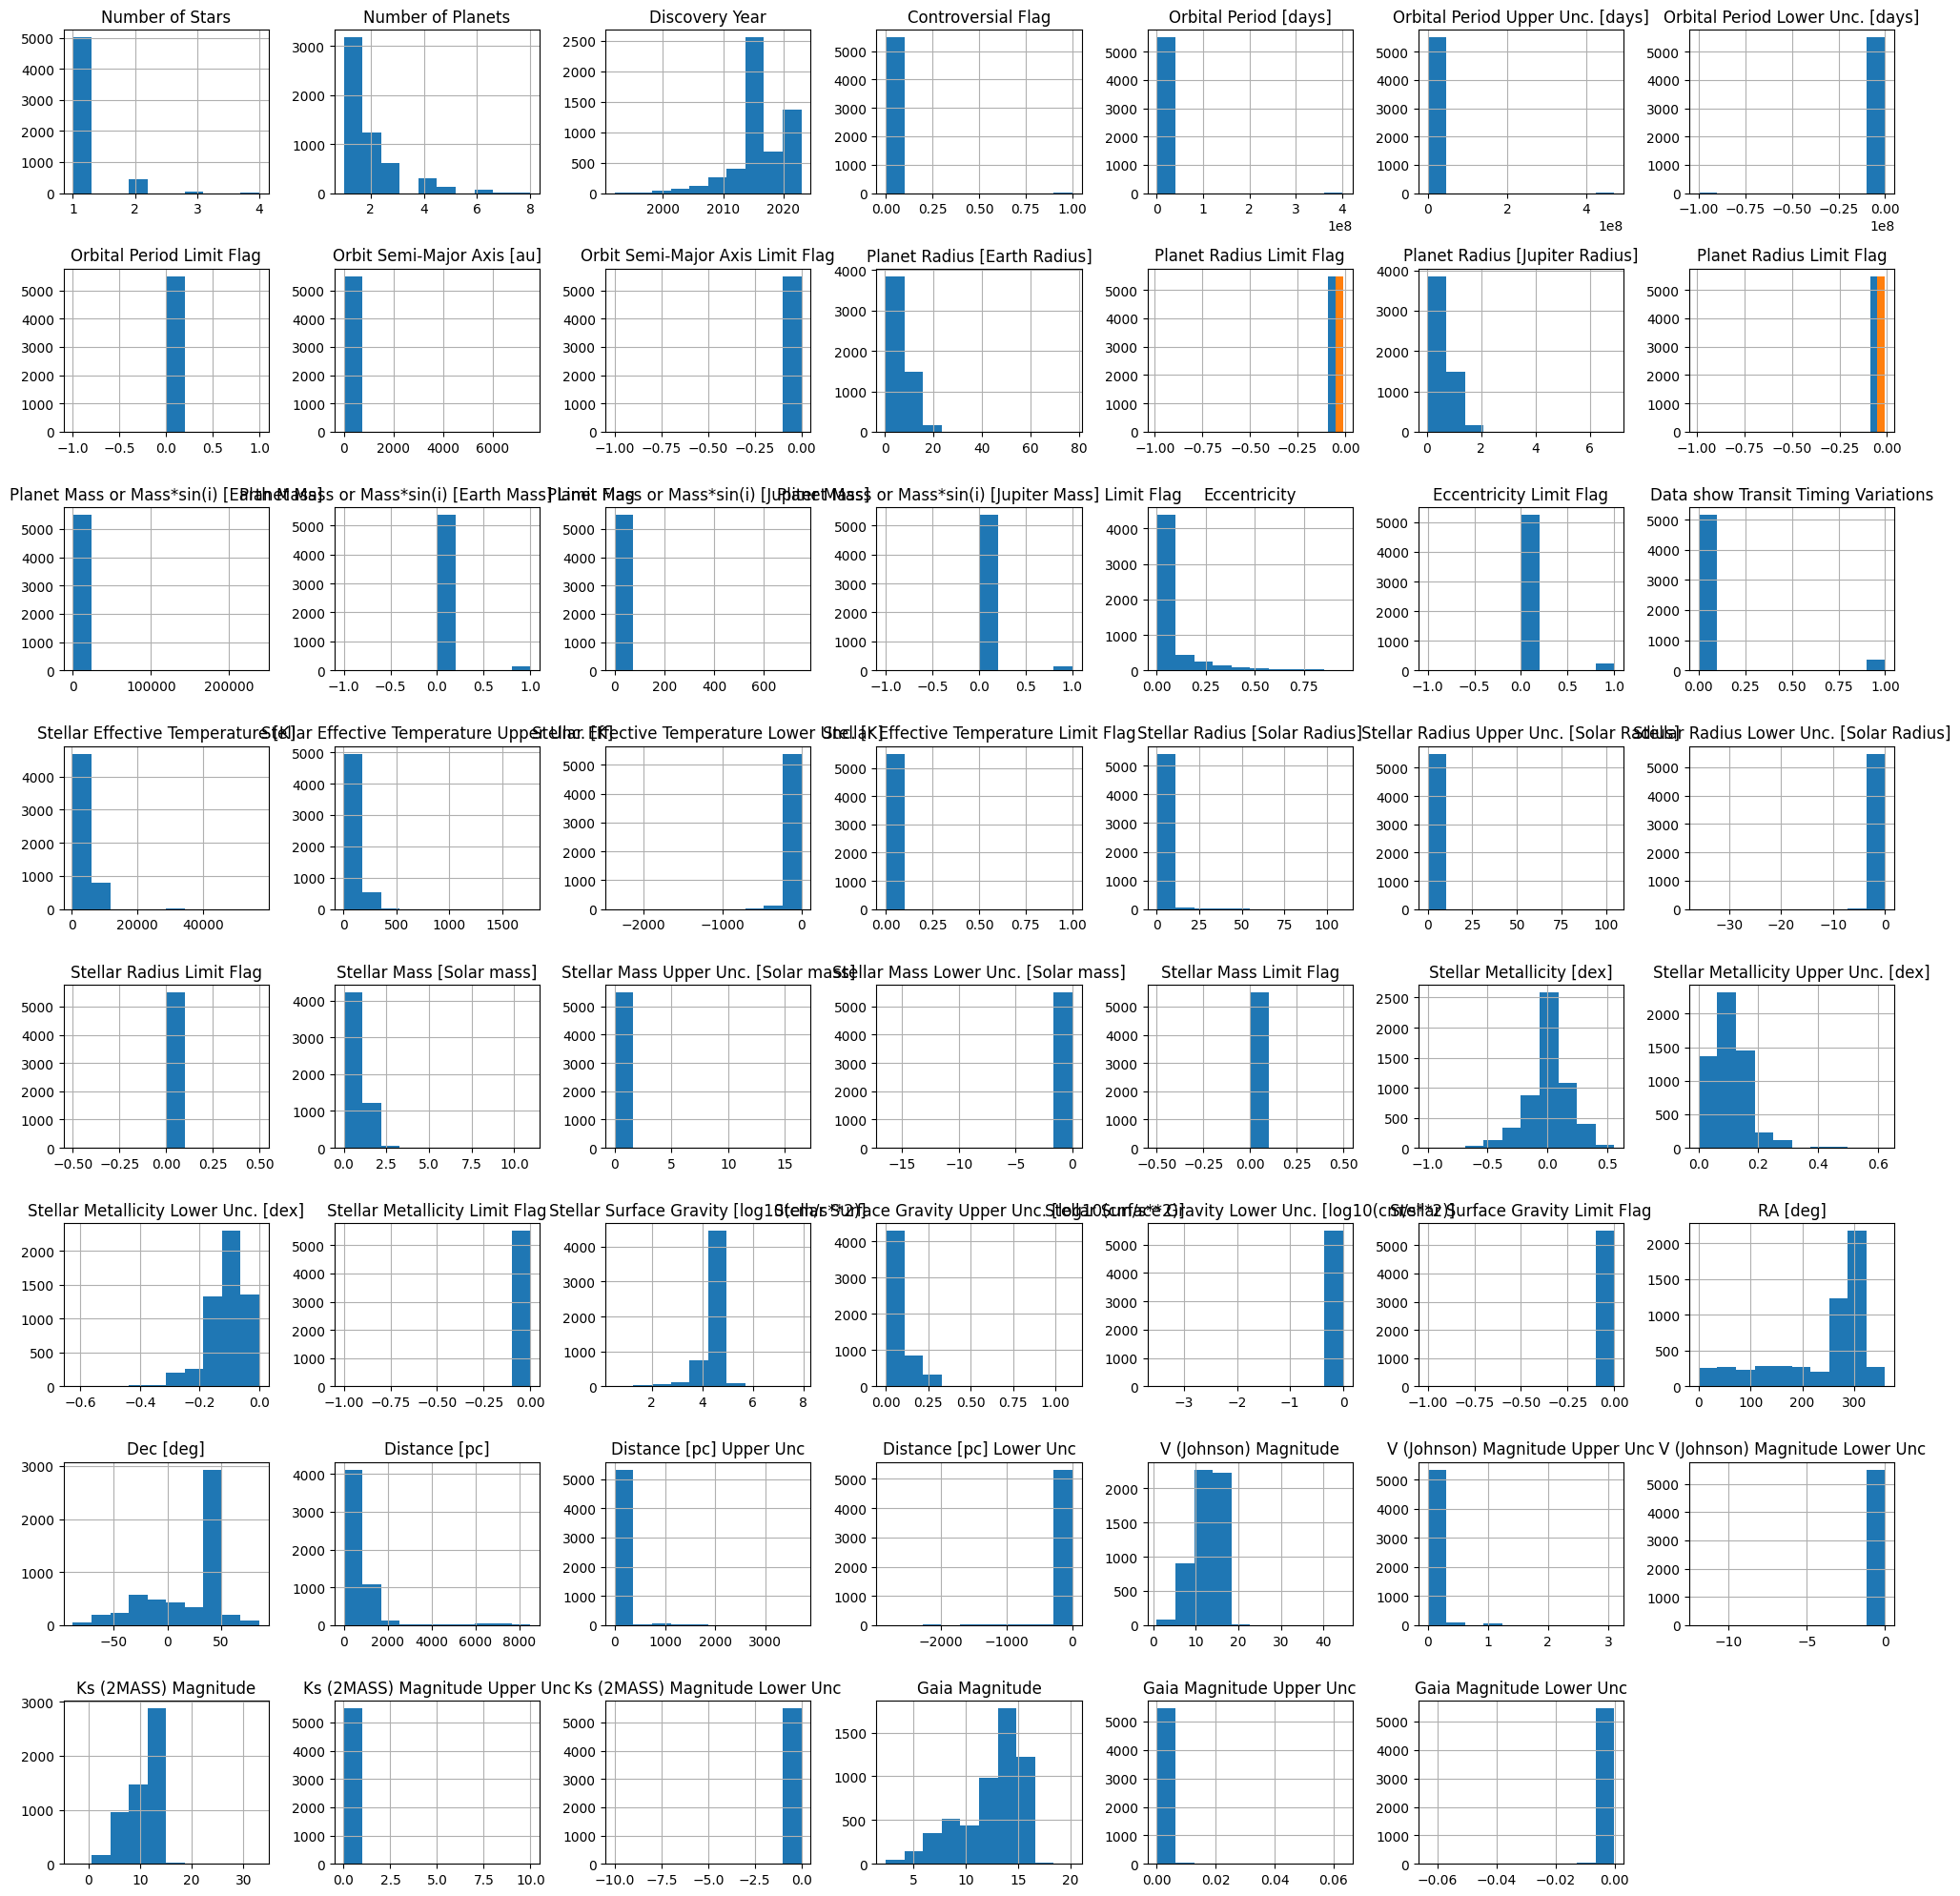

In [24]:
# Distributions of the columns

numerical_columns = result_df.select_dtypes(include=['int', 'float'])

# Plot the distributions using a histogram
numerical_columns.hist(figsize=(20, 20))
plt.tight_layout()
plt.show()

# We should use Normalization because:

- Our dataset is not normally distributed (if it is, we may use standardization which is median = 0, std = 1)
- We already prevented outliers by using Median imputation, so outliers are not going to affect our dataset

Before applying Normalization, we should convert our columns into completely numerical columns

In [25]:
result_df.head(4)

,Planet Name,Host Name,Number of Stars,Number of Planets,Discovery Method,Discovery Year,Discovery Facility,Controversial Flag,Orbital Period [days],Orbital Period Upper Unc. [days],...,Distance [pc] Lower Unc,V (Johnson) Magnitude,V (Johnson) Magnitude Upper Unc,V (Johnson) Magnitude Lower Unc,Ks (2MASS) Magnitude,Ks (2MASS) Magnitude Upper Unc,Ks (2MASS) Magnitude Lower Unc,Gaia Magnitude,Gaia Magnitude Upper Unc,Gaia Magnitude Lower Unc
0,11 Com b,11 Com,2,1,Radial Velocity,2007,Xinglong Station,0,326.03000,0.32000,...,-1.9238,4.72307,0.023,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848
1,11 UMi b,11 UMi,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,0,516.21997,3.20000,...,-1.9765,5.01300,0.005,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903
2,14 And b,14 And,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,0,185.84000,0.23000,...,-0.7140,5.23133,0.023,-0.023,2.331,0.240,-0.240,4.91781,0.002826,-0.002826
3,14 Her b,14 Her,1,2,Radial Velocity,2002,W. M. Keck Observatory,0,1765.03890,1.67709,...,-0.0073,6.61935,0.023,-0.023,4.714,0.016,-0.016,6.38300,0.000351,-0.000351


### the Columns that are not float or integer

In [26]:
result_df.select_dtypes(exclude=['float', 'int']).columns 

Index(['Planet Name', 'Host Name', 'Discovery Method', 'Discovery Facility',
       'Planet Mass or Mass*sin(i) Provenance', 'Stellar Metallicity Ratio',
       'RA [sexagesimal]', 'Dec [sexagesimal]'],
      dtype='object')

### pl_name is going to be my dependent variable (y)

In [27]:
result_df["Planet Name"].head(5)

0      11 Com b
1      11 UMi b
2      14 And b
3      14 Her b
4    16 Cyg B b
Name: Planet Name, dtype: object

In [28]:
planets[planets["Short_Name"] == 'disc_facility']

,Short_Name,Long_Name
6,disc_facility,Discovery Facility


In [29]:
result_df["Discovery Facility"].head(2)

0                          Xinglong Station
1    Thueringer Landessternwarte Tautenburg
Name: Discovery Facility, dtype: object

In [30]:
planets[planets["Short_Name"] == 'pl_bmassprov']

,Short_Name,Long_Name
32,pl_bmassprov,Planet Mass or Mass*sin(i) Provenance


In [31]:
result_df["Planet Mass or Mass*sin(i) Provenance"].value_counts().keys()

Index(['M-R relationship', 'Mass', 'Msini', 'Msin(i)/sin(i)'], dtype='object', name='Planet Mass or Mass*sin(i) Provenance')

## Planet Mass or Mass*sin(i) Provenance:

- Planet Mass refers to the actual mass of an exoplanet, which is a crucial parameter in understanding its characteristics and formation history.
Mass*sin(i) represents the minimum mass of an exoplanet, and it is derived from the radial velocity method of planet detection. It accounts for the inclination angle (i) of the planet's orbit relative to the line of sight.
M-R Relationship:

- M-R stands for Mass-Radius relationship, which is a fundamental connection between the mass and radius of a celestial object, such as a planet. This relationship helps scientists infer the composition and internal structure of exoplanets based on their observed mass and size.
Mass:

- In the context of exoplanets, "Mass" refers to the actual, measured mass of a planet. This value provides insights into the planet's composition, density, and gravitational effects.
Msini:

- Msini is a parameter used in the context of exoplanet studies, especially when planets are detected using the radial velocity method. It represents the minimum mass of a planet, assuming a specific orbital inclination angle (i). It helps establish a lower limit on a planet's mass.
Msin(i)/sin(I):

- This expression represents the true mass of an exoplanet (M) divided by the sine of the inclination angle (i) of its orbit, divided by the sine of the inclination angle (I) of the observer's line of sight. It is used to calculate the true mass of an exoplanet when its orbital inclination is known.

Importance of these parameters: 

1-) Mass and Radius (M-R Relationships)  <br>
2-) Mass*sin(i) and Msin(i)/sin(I) <br>
3-) Msini <br>
4-) Mass

In [32]:
pl_bmassprov_map = {
    'M-R relationship':1,
    'Msin(i)/sin(i)': 2,
    'Msini': 3,
    'Mass': 4
}

result_df["Planet Mass or Mass*sin(i) Provenance"] = result_df["Planet Mass or Mass*sin(i) Provenance"].map(pl_bmassprov_map)


In [33]:
result_df["Planet Mass or Mass*sin(i) Provenance"].isnull().sum()

0

In [34]:
planets[planets["Short_Name"] == 'st_metratio']

,Short_Name,Long_Name
63,st_metratio,Stellar Metallicity Ratio


In [35]:
result_df["Stellar Metallicity Ratio"].head(5)

0    [Fe/H]
1    [Fe/H]
2    [Fe/H]
3    [Fe/H]
4    [Fe/H]
Name: Stellar Metallicity Ratio, dtype: object

In [36]:
result_df["Stellar Metallicity Ratio"].value_counts().keys()

Index(['[Fe/H]', '[M/H]', '[m/H]', '[Me/H]', '[Fe/H['], dtype='object', name='Stellar Metallicity Ratio')

#### To understand much better, I will change the name of values

In [37]:
st_metratio_key_change = {
    '[Fe/H]': 'Fe_H',
    '[M/H]': 'M_H',
    '[m/H]': 'm_H',
    '[Me/H]': 'Me_H',
    "[Fe/H[']": 'Fe_H_Non'
}

st_metratio_mapping = {
    'Fe_H':1,
    'M_H':2,
    'm_H':3,
    'Me_H':4,
    'Fe_H_Non':5
}


In [38]:
result_df['Stellar Metallicity Ratio'] = result_df['Stellar Metallicity Ratio'].replace(st_metratio_key_change)
result_df["Stellar Metallicity Ratio"] = result_df["Stellar Metallicity Ratio"].map(st_metratio_mapping)
result_df["Stellar Metallicity Ratio"].value_counts()

Stellar Metallicity Ratio
1.0    4911
2.0     566
3.0      20
4.0       4
Name: count, dtype: int64

In [39]:
planets[planets["Short_Name"] == 'rastr']

,Short_Name,Long_Name
68,rastr,RA [sexagesimal]


In [40]:
result_df["RA [sexagesimal]"].value_counts().keys()

Index(['18h57m44.03s', '23h06m30.33s', '19h48m27.62s', '01h37m53.55s',
       '19h44m27.02s', '12h48m44.38s', '20h08m06.15s', '19h10m47.52s',
       '23h13m20.93s', '00h29m12.48s',
       ...
       '19h42m00.64s', '19h15m00.00s', '19h27m29.12s', '19h38m16.65s',
       '18h45m17.42s', '19h09m31.71s', '19h37m52.44s', '18h44m26.82s',
       '19h24m34.84s', '19h54m14.99s'],
      dtype='object', name='RA [sexagesimal]', length=4094)

##### Unnecessary columns

In [41]:
result_df.drop(["RA [sexagesimal]","Discovery Facility","Dec [sexagesimal]","Host Name","Discovery Method"],axis=1,inplace=True)

In [42]:
# Label Encoding for our dependent variable which is (y)
# <---->
# Question: Why do I use Label Encoding?
# Answer: I use Label Encoding instead of mapping technique because my dependent variable includes tons of variable and it's hard to convert
# manually by using mapping. Also, if there are many unique values in dependent variable, using One Hot Encoding is a major disadvantage for the model.
# Label Encoding is generally used to dependent variable that has hierarchical or ordinal relationship among its categories but it's okay to
# use it if you have many unique values in it, Label encoding is going to treat the unique values equally in that case. 

def encode_categorical_data(y):
    # Initialize the LabelEncoder
    label_encoder = LabelEncoder()
    
    # Fit the encoder to your categorical data and transform it
    y_encoded = label_encoder.fit_transform(y)
    
    return y_encoded


In [43]:
result_df["Planet Name"] = encode_categorical_data(result_df["Planet Name"])

In [55]:
# Train-Test Splitting

X = result_df.drop("Planet Name",axis=1)
y = result_df["Planet Name"]

In [60]:
X = X.fillna(X.median())

In [62]:
y.isnull().sum()

0

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train_list = X_train.columns

file_path = "X_train_list.txt"

with open(file_path, "w") as file:
    # Iterate through the list
    for item in X_train_list:
        # Write each item to the file followed by a newline character
        file.write(item + "\n")

#### We should use "Normalization" after splitting because of *Data Leakage*
##### - Data leakage is when information from outside the training dataset is used to create the model. This additional information can allow the model to learn or know something that it otherwise would not know and in turn invalidate the estimated performance of the mode being constructed.

In [47]:
#Normalization (X_train,X_test)

scaler = StandardScaler() 

normalized_x_train = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns = X_train.columns
)
normalized_x_test = pd.DataFrame(
    scaler.transform(X_test),
    columns = X_test.columns
)

In [48]:
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

,Number of Stars,Number of Planets,Discovery Year,Controversial Flag,Orbital Period [days],Orbital Period Upper Unc. [days],Orbital Period Lower Unc. [days],Orbital Period Limit Flag,Orbit Semi-Major Axis [au],Orbit Semi-Major Axis Limit Flag,...,Distance [pc] Lower Unc,V (Johnson) Magnitude,V (Johnson) Magnitude Upper Unc,V (Johnson) Magnitude Lower Unc,Ks (2MASS) Magnitude,Ks (2MASS) Magnitude Upper Unc,Ks (2MASS) Magnitude Lower Unc,Gaia Magnitude,Gaia Magnitude Upper Unc,Gaia Magnitude Lower Unc
0,-0.299694,1.062835,-0.489166,-0.070052,-0.023101,-0.030921,0.027212,0.016473,-0.052946,0.016473,...,-0.064025,0.993957,3.045228,-1.860387,1.284538,0.227550,-0.222959,1.159068,-0.066836,0.066836
1,-0.299694,1.062835,1.102242,-0.070052,-0.023610,-0.030921,0.027212,0.016473,-0.056185,0.016473,...,0.225445,-2.047395,-0.505694,0.320491,-1.897977,-0.072601,0.070775,-2.091226,-0.196665,0.196665
2,-0.299694,-0.675235,-0.034478,-0.070052,-0.023519,-0.030921,0.027212,0.016473,-0.055560,0.016473,...,0.120691,1.050236,7.040871,-4.314401,1.073644,0.015865,-0.015799,1.158760,-0.029657,0.029657
3,-0.299694,0.193800,1.556930,-0.070052,-0.023307,-0.030921,0.027212,0.016473,-0.054300,0.016473,...,0.216760,0.474032,-0.081499,0.059962,0.418835,-0.072601,0.070775,0.521219,-0.228532,0.228532
4,-0.299694,-0.675235,1.556930,-0.070052,-0.023584,-0.030921,0.027212,0.016473,-0.036681,0.016473,...,-6.364808,0.240900,-0.163601,0.110387,0.277680,-0.075760,0.073867,0.273675,-0.156536,0.156536
5,-0.299694,-0.675235,-0.034478,-0.070052,-0.023654,-0.030921,0.027212,0.016473,-0.056696,0.016473,...,0.048169,0.846389,0.698472,-0.419075,1.023687,0.019024,-0.018891,0.942983,-0.043230,0.043230
6,-0.299694,-0.675235,-0.943854,-0.070052,-0.023645,-0.030921,0.027212,0.016473,-0.056649,0.016473,...,0.225356,-0.142419,-0.601480,0.379320,-0.894137,-0.075760,0.073867,-0.385806,0.369272,-0.369272
7,-0.299694,1.062835,-1.625886,-0.070052,-0.023638,-0.030921,0.027212,0.016473,-0.056488,0.016473,...,0.225488,-2.641105,-0.394856,0.252418,-2.581621,0.597208,-0.584716,-2.710495,2.915749,-2.915749
8,-0.299694,-0.675235,-0.034478,-0.070052,-0.022479,-0.030921,0.027212,0.016473,-0.050576,0.016473,...,-0.324167,0.952403,2.422619,-1.477998,1.058221,0.025343,-0.025075,1.000817,-0.113456,0.113456
9,-0.299694,1.062835,-0.489166,-0.070052,-0.023654,-0.030921,0.027212,0.016473,-0.056688,0.016473,...,0.117545,0.720416,0.383747,-0.225779,0.957636,-0.003092,0.002752,0.828201,-0.193124,0.193124
